# Resampling Methods - Lab

## Introduction

Now that you have some preliminary background on bootstrapping, jackknife, and permutation tests, its time to practice those skills by coding them into functions. You'll then apply these tests to a hypothesis test and compare the results to a parametric t-test.

## Objectives

In this lab you will: 

* Create functions that perform resampling techniques and use them on datasets

## Bootstrap sampling


Bootstrap sampling works by combining two distinct samples into a universal set and generating random samples from this combined sample space in order to compare these random splits to the two original samples. The idea is to see if the difference between the two **original** samples is statistically significant. If similar differences can be observed through the random generation of samples, then the observed differences are not actually significant.


Write a function to perform bootstrap sampling. The function should take in two samples A and B. The two samples need not be the same size. From this, create a universal sample by combining A and B. Then, create a resampled universal sample of the same size using random sampling with replacement. Finally, split this randomly generated universal set into two samples which are the same size as the original samples, A and B. The function should return these resampled samples.

Example:

```python

A = [1,2,3]
B = [2,2,5,6]

Universal_Set = [1,2,2,2,3,5,6]
Resampled_Universal_Set = [6, 2, 3, 2, 1, 1, 2] # Could be different (randomly generated with replacement)

Resampled_A = [6,2,3]
Resampled_B = [2,1,1,2]
```

In [2]:
import numpy as np


In [3]:

A = [1,2,3]
B = [2,2,5,6]
print(A+B)
np.random.choice(A+B,len(A+B),replace=True)

[1, 2, 3, 2, 2, 5, 6]


array([2, 3, 2, 6, 6, 6, 3])

In [4]:

def bootstrap(sample1,sample2):
    
    #create universal set by combining sample1 and 2
    Universal_Set=sample1+sample2
    #create a resampled universal sample of the same size using random sampling with replacement.
    Resampled_Universal_Set=np.random.choice(Universal_Set,len(Universal_Set),replace=True)
    #split this randomly generated universal set into two samples which are the same size as the original samples
    Resampled1=Resampled_Universal_Set[:len(sample1)]
    Resampled2=Resampled_Universal_Set[len(sample1):]
    return Resampled1,Resampled2

In [5]:
A = [1,2,3]
B = [2,2,5,6]
bootstrap(A,B)

(array([5, 2, 1]), array([3, 2, 1, 1]))

## Jackknife 

Write a function that creates additional samples by removing one element at a time. The function should do this for each of the `n` items in the original sample, returning `n` samples, each with `n-1` members.

In [6]:
listo=[1,2,3,3,3,4,4,5,6,7,8,9,1,2,3,4,5,6]
listo[:8]+listo[9:]

[1, 2, 3, 3, 3, 4, 4, 5, 7, 8, 9, 1, 2, 3, 4, 5, 6]

In [7]:
def jack1(list_of_observations):
    """This function should take in a list of n observations and return n lists
    each with one member (presumably the nth) removed."""
    samples=[]
    for i in range(len(list_of_observations)):
        samples.append(list_of_observations[:i] + list_of_observations[i+1:])
    return samples
    

In [8]:
listo=[1,2,3,3,3,4,4,5,6,7,8,9,1,2,3,4,5,6]
print(listo)
res=jack1(listo)
res

[1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6]


[[2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 7, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 8, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 9, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 3, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 4, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 5, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 6],
 [1, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5]]

In [9]:
len(listo),len(res)

(18, 18)

In [10]:
for elem in res:
    print(len(elem))

17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17


## Permutation testing

Define a function that generates all possible, equally sized, two set splits of two sets A and B. Sets A and B need not be the same size, but all of the generated two set splits should be of equal size. For example, if we had a set with 5 members and a set with 7 members, the function would return all possible 5-7 ordered splits of the 12 items.

> Note that these are actually combinations! However, as noted previously, permutation tests really investigate possible regroupings of the data observations, so calculating combinations is a more efficient approach!


Here's a more in depth example:

```python
A = [1, 2, 2]
B = [1, 3]
combT(A, B) 
[([1,2,2], [1,3]),
 ([1,2,3], [1,2]),
 ([1,2,1], [2,3]),
 ([1,1,3], [2,2]),
 ([2,2,3], [1,1])]
               
```  

These are all the possible 3-2 member splits of the 5 elements: 1, 1, 2, 2, 3. 

In [11]:
import itertools

In [12]:

A = [1, 2, 2]
B = [1, 3]

AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=list(itertools.combinations(AB,3))
print(comb)
print(set(comb))

combs=list(itertools.combinations(ABs,3))
print(combs)
print(set(combs))

[1, 2, 2, 1, 3] [1, 1, 2, 2, 3]
[(1, 2, 2), (1, 2, 1), (1, 2, 3), (1, 2, 1), (1, 2, 3), (1, 1, 3), (2, 2, 1), (2, 2, 3), (2, 1, 3), (2, 1, 3)]
{(1, 2, 1), (1, 2, 2), (1, 1, 3), (2, 2, 1), (1, 2, 3), (2, 2, 3), (2, 1, 3)}
[(1, 1, 2), (1, 1, 2), (1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 2, 3), (1, 2, 2), (1, 2, 3), (1, 2, 3), (2, 2, 3)]
{(1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 1, 2), (2, 2, 3)}


In [13]:
A = [3, 4]
B = [1, 2]
AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=itertools.combinations(AB,2)
print(set(comb))

combs=itertools.combinations(ABs,2)
print(set(combs))

[3, 4, 1, 2] [1, 2, 3, 4]
{(1, 2), (3, 2), (4, 1), (3, 1), (4, 2), (3, 4)}
{(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (2, 4)}


In [14]:
A = [4, 5]
B = [1, 2, 3]
AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=itertools.combinations(AB,3)
print(set(comb))

combs=itertools.combinations(ABs,3)
print(set(combs))

[4, 5, 1, 2, 3] [1, 2, 3, 4, 5]
{(4, 5, 2), (4, 1, 3), (5, 1, 2), (5, 2, 3), (4, 5, 3), (1, 2, 3), (5, 1, 3), (4, 2, 3), (4, 5, 1), (4, 1, 2)}
{(2, 3, 5), (1, 2, 3), (1, 3, 5), (1, 4, 5), (1, 2, 4), (1, 3, 4), (2, 4, 5), (3, 4, 5), (2, 3, 4), (1, 2, 5)}


In [15]:
A = [3, 4]
B = [1, 2, 3]
AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=itertools.combinations(AB,3)
print(set(comb))

combs=itertools.combinations(ABs,3)
print(set(combs))

[3, 4, 1, 2, 3] [1, 2, 3, 3, 4]
{(3, 4, 3), (4, 1, 3), (1, 2, 3), (4, 2, 3), (3, 4, 1), (3, 1, 3), (4, 1, 2), (3, 2, 3), (3, 4, 2), (3, 1, 2)}
{(2, 3, 3), (1, 2, 3), (3, 3, 4), (1, 2, 4), (1, 3, 4), (2, 3, 4), (1, 3, 3)}


In [16]:
A = [3, 4]
B = [1, 2, 2]
AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=itertools.combinations(AB,3)
print(set(comb))

combs=itertools.combinations(ABs,3)
print(set(combs))

[3, 4, 1, 2, 2] [1, 2, 2, 3, 4]
{(4, 2, 2), (1, 2, 2), (3, 2, 2), (3, 4, 1), (4, 1, 2), (3, 4, 2), (3, 1, 2)}
{(1, 2, 2), (2, 2, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4), (2, 2, 3)}


In [17]:
A = [1, 2,2]
B = [1, 4]
AB = A+B

ABs=sorted(A+B)
print(AB,ABs)

comb=itertools.combinations(AB,3)
print(set(comb))

combs=itertools.combinations(ABs,3)
print(set(combs))

[1, 2, 2, 1, 4] [1, 1, 2, 2, 4]
{(1, 2, 1), (1, 2, 2), (2, 2, 1), (2, 1, 4), (2, 2, 4), (1, 2, 4), (1, 1, 4)}
{(1, 2, 2), (2, 2, 4), (1, 1, 2), (1, 2, 4), (1, 1, 4)}


In [18]:
t=(1,3,2)
type(t), sorted(t), type(sorted(t))

(tuple, [1, 2, 3], list)

In [19]:
a = [1, 2, 2]
b = [1, 3]
ab=sorted(a+b)
comb=list(itertools.combinations(ab,len(a)))
print( set(comb) )
for tuple in set(comb):
    for num in tuple:
        print(num)
ab2=ab.copy()
print(ab2)
ab2.remove(1)
print(ab2)
ab2.remove(1)
print(ab2)
ab2.remove(2)
print(ab2)
list(itertools.combinations(ab2,len(ab)-len(a)))


{(1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 1, 2), (2, 2, 3)}
1
1
3
1
2
2
1
2
3
1
1
2
2
2
3
[1, 1, 2, 2, 3]
[1, 2, 2, 3]
[2, 2, 3]
[2, 3]


[(2, 3)]

In [20]:
def combT(a,b):
#     It is important to sort the concatenation of a and b
#     If the numbers are not sorted, then permutations (not combinations) can get created.
#     example: (1,2,3) (1,3,2)
#     And it would require another step to remove these duplicated combinations
    ab=sorted(a+b)
    comb=list(itertools.combinations(ab,len(a)))
#     comb is a list of tuples. Need to remove duplicates, if any, by using set()
    comb2=[]
    for tuplo in set(comb):
        ab_copy=ab.copy()
        for num in tuplo:
            ab_copy.remove(num)
        tupli=(*ab_copy,)
        comb2.append( [tuplo,tupli] ) 

    return comb2
        

In [21]:
a = [1, 2, 2]
b = [1, 3]
combT(a,b)


[[(1, 1, 3), (2, 2)],
 [(1, 2, 2), (1, 3)],
 [(1, 2, 3), (1, 2)],
 [(1, 1, 2), (2, 3)],
 [(2, 2, 3), (1, 1)]]

In [22]:
# flatiron solution:

from itertools import combinations

def combT2(a, b):
    union = sorted(a + b)
    all_combs = []
    for x in set(combinations(union, len(a))):
        union_copy = union.copy()
        for y in x:
            union_copy.remove(y)
        all_combs.append((list(x), list(combinations(union_copy, len(union) - len(a)))))
    return all_combs

a = [1, 2, 2]
b = [1, 3]
combT2(a,b)


[([1, 1, 3], [(2, 2)]),
 ([1, 2, 2], [(1, 3)]),
 ([1, 2, 3], [(1, 2)]),
 ([1, 1, 2], [(2, 3)]),
 ([2, 2, 3], [(1, 1)])]

## Permutation testing in Practice
Let's further investigate the scenario proposed in the previous lesson. Below are two samples A and B. The samples are mock data for the blood pressure of sample patients. The research study is looking to validate whether there is a statistical difference in the blood pressure of these two groups using a 5% significance level.  First, calculate the mean blood pressure of each of the two samples. Then, calculate the difference of these means. From there, use your `combT()` function, defined above, to generate all the possible combinations of the entire sample data into A-B splits of equivalent sizes as the original sets. For each of these combinations, calculate the mean blood pressure of the two groups and record the difference between these sample means. The full collection of the difference in means between these generated samples will serve as the denominator to calculate the p-value associated with the difference between the original sample means.

For example, in our small handwritten example above:

$\mu_a = \frac{1+2+2}{3} = \frac{5}{3}$  
and  
$\mu_b = \frac{1+3}{2} = \frac{4}{2} = 2$  

Giving us

$\mu_a - \mu_b = \frac{5}{3} - 2 = \frac{1}{2}$

In comparison, for our various combinations we have:

([1,2,2], [1,3]):  $\mu_a - \mu_b = \frac{5}{3} - 2 = \frac{1}{2}$  
([1,2,3], [1,2]):  $\mu_a - \mu_b = 2 - \frac{3}{2} = \frac{1}{2}$  
([1,2,1], [2,3]):  $\mu_a - \mu_b = \frac{4}{3} - \frac{5}{3} = -\frac{1}{2}$  
([1,1,3], [2,2]):  $\mu_a - \mu_b = \frac{5}{3} - 2 = \frac{1}{2}$  
([2,2,3], [1,1]):  $\mu_a - \mu_b = \frac{7}{3} - 1 = \frac{4}{3}$  

A standard hypothesis test for this scenario might be:

$H_0: \mu_a = \mu_b$  
$H_1: \mu_a < \mu_b$  
  
Thus comparing our sample difference to the differences of our possible combinations, we look at the number of experiments from our combinations space that were the same or greater than our sample statistic, divided by the total number of combinations. In this case, 4 out of 5 of the combination cases produced the same or greater differences in the two sample means. This value .8 is a strong indication that we cannot refute the null hypothesis for this instance.

In [24]:
# a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
#        122.93336175, 110.9271756 , 114.77443758, 116.34159338,
#        112.66413025, 118.30562665, 132.31196515, 117.99000948]
# b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
#        123.2703033 , 123.76944385, 105.95249634, 114.87114479,
#        130.6878082 , 140.60768727, 121.95433026, 123.11996767,
#        129.93260914, 121.01049611]

In [25]:
# proposed examples make the execution of combT way too long
# reducing their lengths
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       129.93260914, 121.01049611]

In [26]:
# Your code here
# ⏰ Expect your code to take several minutes to run
result=combT(a,b)

In [27]:
len(result)

3003

In [28]:
len(a),len(b),len(result)


(8, 6, 3003)

In [ ]:
# number of combinations of 8 in 14 = 14!/((14-8)!8!) =3003

In [29]:
len(a),len(b),len(result[0]),len(result[0][0]),len(result[0][1])

(8, 6, 2, 8, 6)

In [30]:
meana=np.mean(a)
meanb=np.mean(b)
diffab=meana-meanb
meana,meanb,diffab

(116.11789447625, 125.78289695500001, -9.665002478750012)

In [31]:
list_of_diff=[]
for elem in result:
    list_of_diff.append(np.mean(elem[0])-np.mean(elem[1]))
len(list_of_diff)


3003

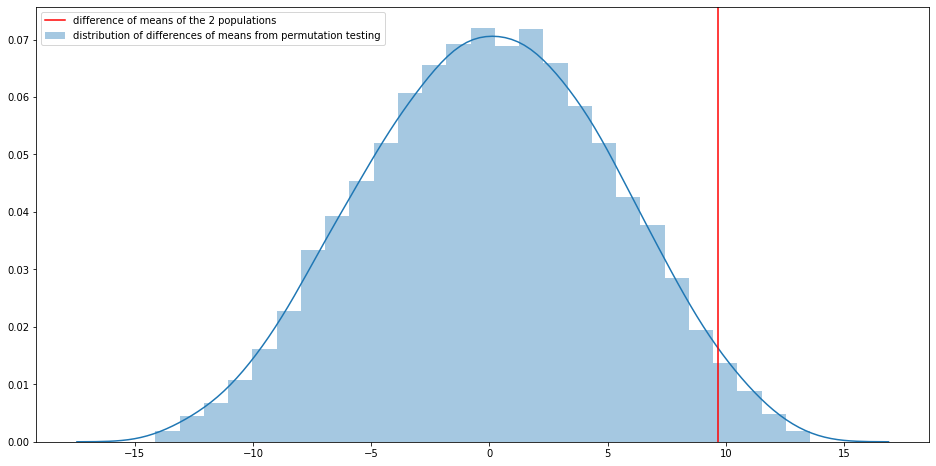

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.distplot (list_of_diff,label='distribution of differences of means from permutation testing')
plt.axvline(x=abs(diffab),ymin=0,ymax=1,c='r',label = ('difference of means of the 2 initial samples'))
plt.axvline(x=xxxxxx,ymin=0,ymax=1,c='r',label = ('+1 std'))

plt.legend()
plt.show()

In [42]:
num = 0 # Initialize numerator
for diff in list_of_diff:
    if diff >= abs(diffab):
        num +=1
p_val = num / len(list_of_diff)
print('number of mean differences higher than mean difference of the 2 initial samples  : {}'.format(num))
print('total number of differences from permutation test:  {}'.format(len(list_of_diff)))
print('P-value: {}'.format(p_val))

number of mean differences higher than mean difference of the 2 initial samples  : 84
total number of differences from permutation test:  3003
P-value: 0.027972027972027972


## T-test revisited

The parametric statistical test equivalent to our permutation test above would be a t-test of the two groups. Perform a t-test on the same data above in order to calculate the p-value. How does this compare to the above results?

In [ ]:
# Your code here

## Bootstrap applied

Use your code above to apply the bootstrap technique to this hypothesis testing scenario. Here's a pseudo-code outline for how to do this:

1. Compute the difference between the sample means of A and B
2. Initialize a counter for the number of times the difference of the means of resampled samples is greater then or equal to the difference of the means of the original samples
3. Repeat the following process 10,000 times:
    1. Use the bootstrap sampling function you used above to create new resampled versions of A and B 
    2. Compute the difference between the means of these resampled samples 
    3. If the difference between the means of the resampled samples is greater then or equal to the original difference, add 1 the counter you created in step 2
4. Compute the ratio between the counter and the number of simulations (10,000) that you performed
    > This ratio is the percentage of simulations in which the difference of sample means was greater than the original difference

In [ ]:
# Your code here

## Summary

Well done! In this lab, you practice coding modern statistical resampling techniques of the 20th century! You also started to compare these non-parametric methods to other parametric methods such as the t-test that we previously discussed.